In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Cargar el conjunto de datos
data = pd.read_csv("/Users/walte/Documents/SEXTO SEMESTRE/ANALISIS DE DATOS/tarea 5/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv")

In [13]:
# Preparación de datos
# Eliminando columnas irrelevantes o con demasiados valores nulos
data_cleaned = data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [17]:
# Llenar valores nulos en 'Age' con la mediana (sin inplace=True)
data_cleaned['Age'] = data_cleaned['Age'].fillna(data_cleaned['Age'].median())

# Eliminar filas con valores nulos restantes
data_cleaned = data_cleaned.dropna()

In [21]:
# Codificación de variables categóricas
label_encoder = LabelEncoder()
data_cleaned['Sex'] = label_encoder.fit_transform(data_cleaned['Sex'])  # 0: female, 1: male
data_cleaned['Embarked'] = label_encoder.fit_transform(data_cleaned['Embarked'])  # codifica los puertos

In [23]:
# Separación de variables independientes (X) y dependientes (y)
X = data_cleaned.drop(columns=['Survived'])  # Características
y = data_cleaned['Survived']  # Objetivo

In [25]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predicción y evaluación del modelo
y_pred = model.predict(X_test)
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]  # Convertir a binario

In [31]:
# Cálculo de métricas
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

In [33]:
# Resultados
print("Error cuadrático medio (MSE):", mse)
print("Precisión:", accuracy)
print("Matriz de confusión:")
print(conf_matrix)

Error cuadrático medio (MSE): 0.14610318696481273
Precisión: 0.7808988764044944
Matriz de confusión:
[[87 22]
 [17 52]]


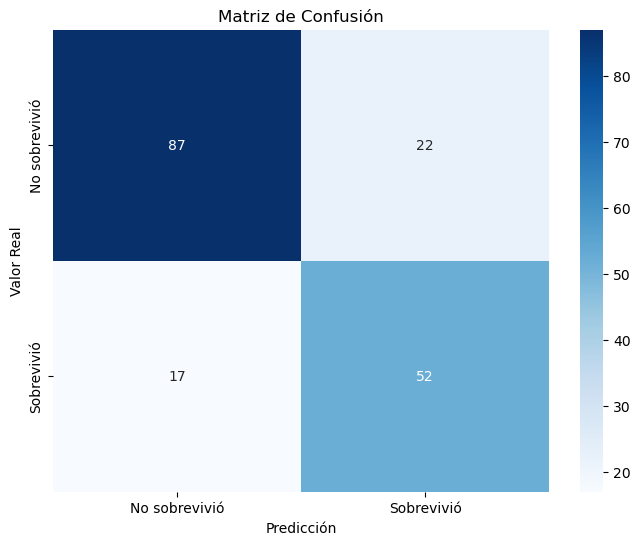

C:\Users\walte\AppData\Local\Temp\ipykernel_6868\3647346068.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette="viridis")


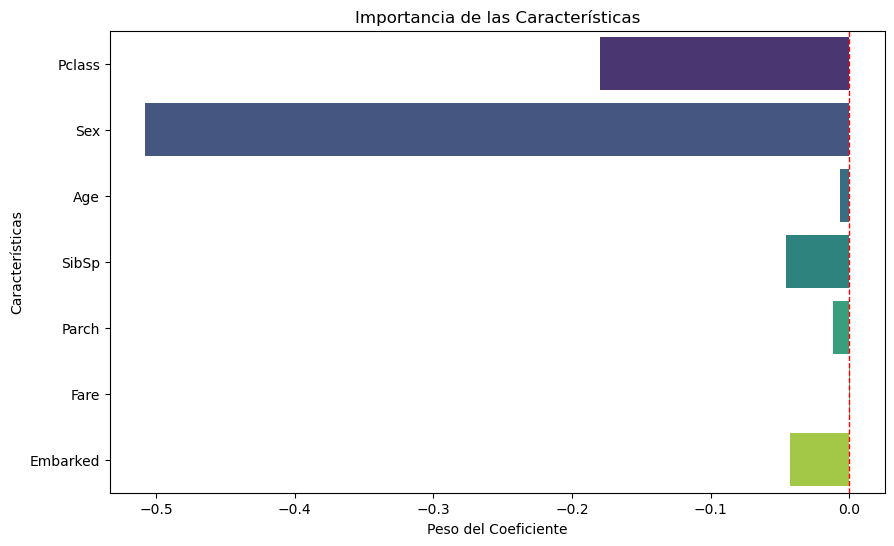

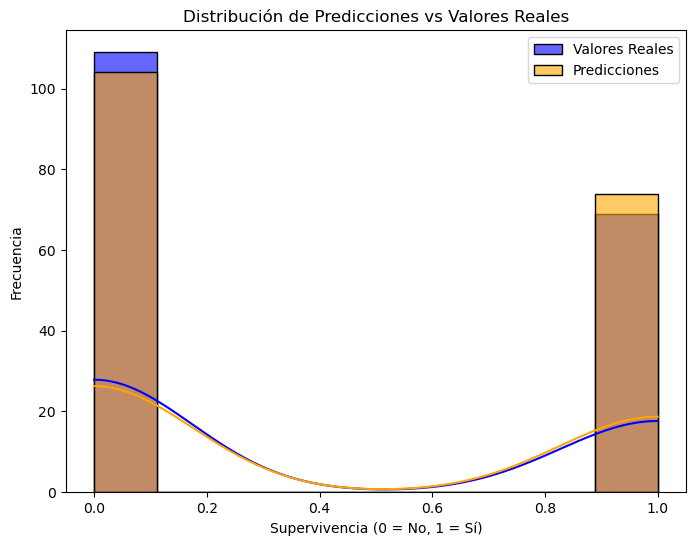

In [37]:

# 1. Gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivió", "Sobrevivió"], yticklabels=["No sobrevivió", "Sobrevivió"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# 2. Importancia de características (coeficientes del modelo)
coefficients = model.coef_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features, palette="viridis")
plt.title("Importancia de las Características")
plt.xlabel("Peso del Coeficiente")
plt.ylabel("Características")
plt.axvline(0, color="red", linestyle="--", linewidth=1)
plt.show()

# 3. Distribución de predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.histplot(y_test, label="Valores Reales", color="blue", alpha=0.6, kde=True)
sns.histplot(y_pred_binary, label="Predicciones", color="orange", alpha=0.6, kde=True)
plt.title("Distribución de Predicciones vs Valores Reales")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()